In [1]:
include("misc.jl")
using .RunOrAnalyze

### Launch a full-suit run:
Given a data file perform
* single (which means just simple prediction of test taxa labels)
* loocv (leave one out cross validation in which we just take the training part of the data and iteratively treat one of its members as test taxa to predict its value. At the end we will have a cross-validation of oor code's predictive power.)
* kfoldcv (k-fold cross validation, in which we just take the training part of the data and divide the shuffled set to K partitions. Iteratively we treat one of the partitions as test set and predict it using training by taking the rest). If wanted we can make more than one such cross-validations to improve statistics.
* bootstrap (in order to have a measure of variance for our predictions, we repeatedly make predictions for test taxa using training sets that are varied according to the bootrap procedure, in which we keep the number of training set the same but the make up of each training set is obtained by resampling the original training set with replacement)


┌ Warning: RCall.jl: Loading required package: RRPP
│ Loading required package: rgl
│ Loading required package: Matrix
│ Loading required package: maps
│ 
│ Attaching package: 'svgViewR'
│ 
│ The following objects are masked from 'package:rgl':
│ 
│     readOBJ, writeOBJ
│ 
│        --- dispRity package ---
│ This is the CRAN release version (1.7.0) of the package.
│ For news, vignettes and future releases,
│ visit https://github.com/TGuillerme/dispRity
│ 
│ 
│ Attaching package: 'dispRity'
│ 
│ The following object is masked from 'package:geomorph':
│ 
│     combine.subsets
│ 
│ The following object is masked from 'package:RRPP':
│ 
│     add.tree
│ 
│ 
│ Attaching package: 'MASS'
│ 
│ The following object is masked from 'package:formattable':
│ 
│     area
│ 
│ Loading required package: mda
│ Loading required package: class
│ Loaded mda 0.5-4
│ 
│ Loading required package: nlme
│ Loading required package: qpcR
│ Loading required package: minpack.lm
│ Loading required package: robustb

[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Loading required package: nnet
│ Loading required package: lattice
│ Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Phylo tree and the main data and strata files have been modified to include duplicated taxa before the scaled random trees are generated."
[1] "* Selected categorical labels column: diving.or.not"
[1] "* diving.or.equal column is identical to Diving column."
[1] "* Regression excludes flying taxa."
[1] "* Diving labels that are present in regression: 0,2"


┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


[1] "* Regression data contains multiple copies of some taxa (user added variants of existing test taxa \n   or replacements due to bootstrap are present) which are not in the phylo tree:"
      bases          duplicates       
 [1,] "Spinosaurus_" "Spinosaurus_.1" 
 [2,] "Spinosaurus_" "Spinosaurus_.2" 
 [3,] "Spinosaurus_" "Spinosaurus_.3" 
 [4,] "Spinosaurus_" "Spinosaurus_.4" 
 [5,] "Spinosaurus_" "Spinosaurus_.5" 
 [6,] "Spinosaurus_" "Spinosaurus_.6" 
 [7,] "Spinosaurus_" "Spinosaurus_.7" 
 [8,] "Spinosaurus_" "Spinosaurus_.8" 
 [9,] "Spinosaurus_" "Spinosaurus_.9" 
[10,] "Spinosaurus_" "Spinosaurus_.10"
[11,] "Spinosaurus_" "Spinosaurus_.11"
[12,] "Suchomimus"   "Suchomimus.1"   
[13,] "Suchomimus"   "Suchomimus.2"   
[14,] "Suchomimus"   "Suchomimus.3"   
[15,] "Baryonyx"     "Baryonyx.1"     
[16,] "Baryonyx"     "Baryonyx.2"     
[17,] "Baryonyx"     "Baryonyx.3"     
 [1] "Spinosaurus_.11" "Spinosaurus_.10" "Spinosaurus_.9"  "Spinosaurus_.8" 
 [5] "Spinosaurus_.7"  "Spinosau

┌ Warning: RCall.jl: Warning: Following taxa dropped from timeList: Rhinoceros_unicornis
└ @ RCall C:\Users\3ric\.julia\packages\RCall\gOwEW\src\io.jl:172


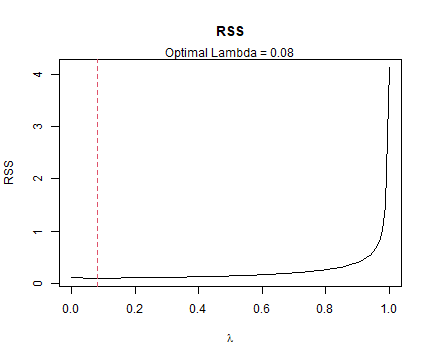

RCall.RObject{RCall.NilSxp}
NULL


In [2]:
# full analysis means performing single (binary_classification), loocv, k-fold cv, and bootstrap

# explanation for addTreeTips: TRUE if either holds: 
#                              a) user added a test taxon as a variant of an existing taxon 
#                              b) any bootstrap run. 

# Always use the data directory for data file location. Easier to keep track of stuff. 


homeDir = "C:/dino_nature/output/2023-11-07-D1"    # where full analysis folders are (or will be) placed at

boneType            = "femur"                                                                # enter "femur" or "ribs" 
dataFile            = "C:/dino_nature/data/D1_femur.csv"                         # bone data file (with path). See above.
applyDataFilter     = "FALSE"                                                                # enter FALSE (no filter) or filter name. (see auxiliary.r) 
addTreeTips         = "TRUE"                                                                 # see explanations
Ntrees              = 100                                                                    # no of random trees to be generated
calculateTrees      = "TRUE"                                                                 # calculate (TRUE) or read (FALSE) trees
saveTrees           = "FALSE"                                                                # save (TRUE) trees (if they are calculated here)
Kcrossvalidation    = 10                                                                     # # of data partitions (K) in a K-fold CV 
Nkfoldcv            = 10                                                                     # how many rounds of k-fold cv is wanted   
Nbootstrapsets      = 2000                                                                   # # of bootstrap sets

newfullsuitrun(homeDir, boneType, dataFile, applyDataFilter, addTreeTips, Ntrees, calculateTrees,saveTrees,Kcrossvalidation,Nkfoldcv,Nbootstrapsets)

### Analyze a Full-suit Run

In [3]:
homeDir = "C:/dino_nature/output/2023-11-07-D1"
Nkfoldcv = 10
fullsuitpostprocess(homeDir, Nkfoldcv)


"C:/dino_nature/output/2023-11-07-D1\\analysis\\bsPCM.csv"

### Run a session for any of "single" or "loocv" or "kfoldcv" or "bs" runs

### Compress the output of only one directory containing either "single" or "loocv" or "kfoldcv" or "bs" runs. 

In [7]:
runType = "kfoldcv"     # Enter one of: "single", "loocv", "kfoldcv", "bs"
baseDir = "c:/dino_nature/output/test_kfoldcv"
compressor(runType, baseDir)

LoadError: IOError: cd("c:/dino_nature/output/test_kfoldcv"): no such file or directory (ENOENT)